## Linear regression with Multiple Features

In [11]:
from sklearn.datasets import load_boston
import pandas as pd

In [12]:
boston = load_boston()

X =boston.data
y = boston.target

In [13]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [14]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [20]:
df=pd.DataFrame(X)
df.columns= boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [22]:
## normaizing the dataset
import numpy as np
u = np.mean(X,axis=0)
std=np.std(X,axis=0)
    

In [23]:
X=(X-u)/std

In [27]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

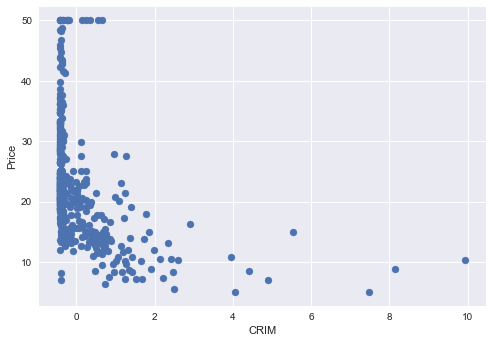

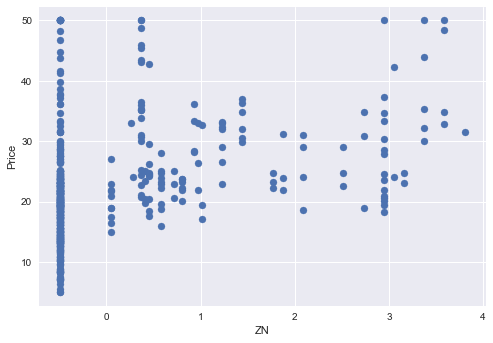

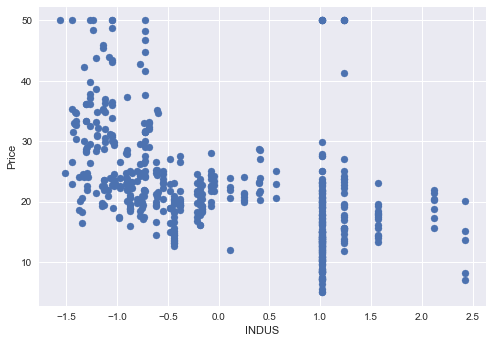

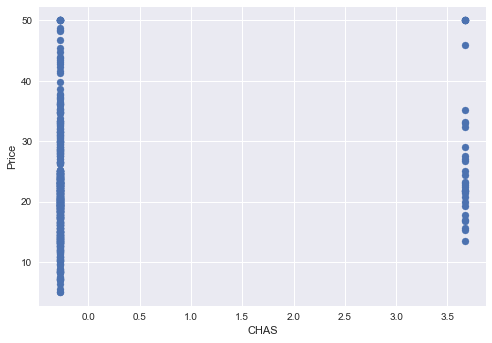

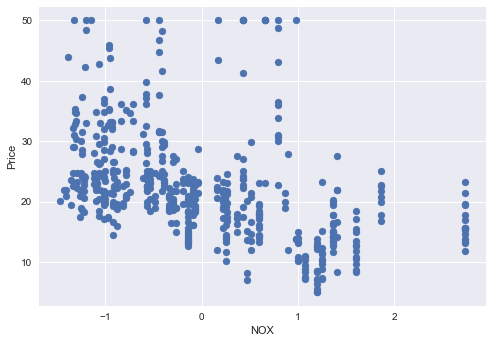

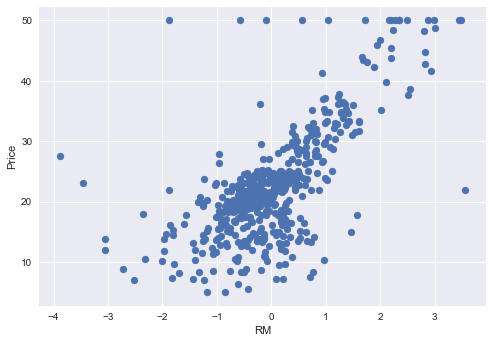

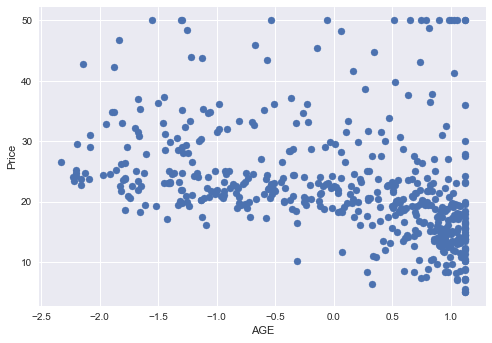

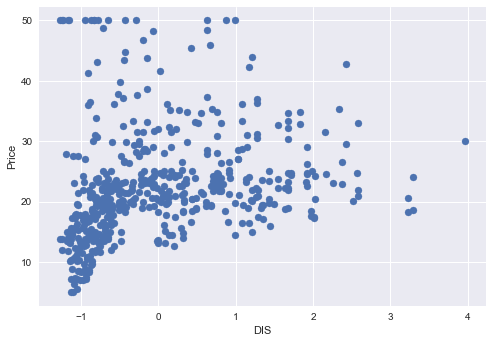

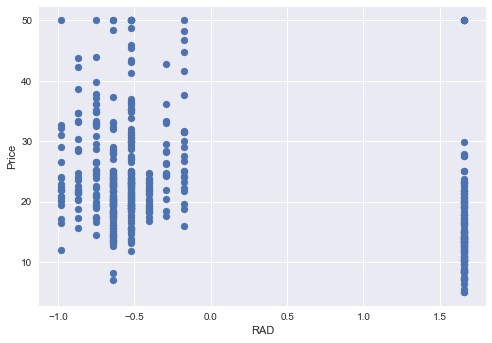

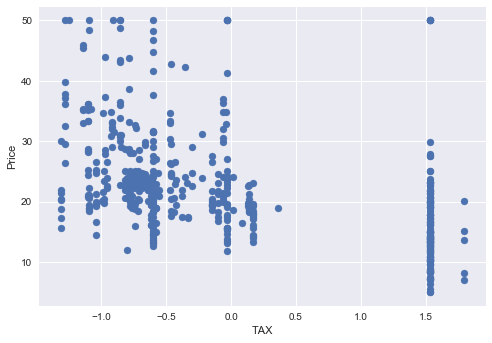

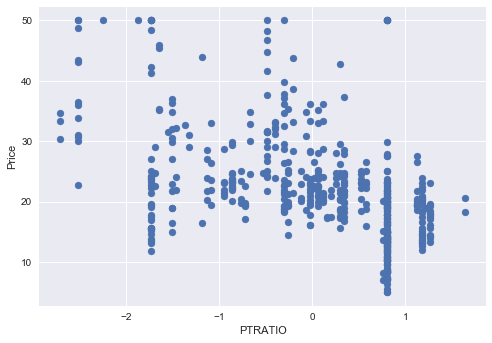

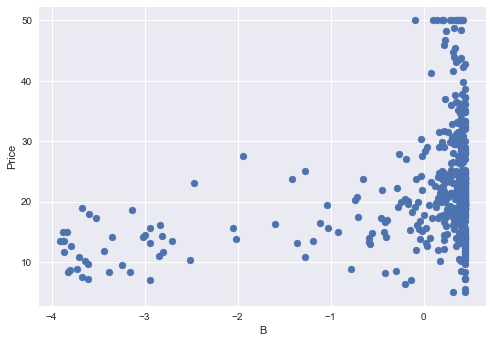

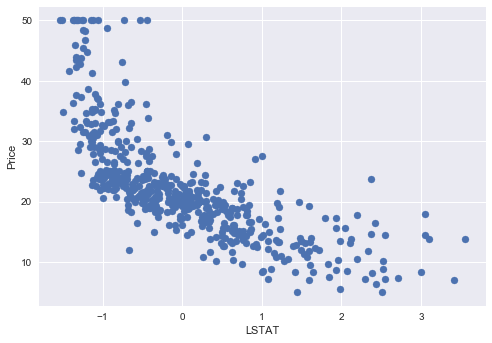

In [34]:
for i in range(13):
    plt.scatter(X[:,i],y)
    plt.xlabel(boston.feature_names[i])
    plt.ylabel('Price')
    plt.show()

In [36]:
print(X.shape)
ones  = np.ones((X.shape[0],1))
X=np.hstack((ones,X))
print(X.shape)

(506, 13)
(506, 14)


In [37]:
def hypothesis(x,theta):
    y_ = 0.0
    n = x.shape[0]
    for i in range(n):
        y_ +=theta[i]*x[i]
    return y_

def error(X,Y,theta):
    e=0.0
    m=X.shape[0]
    
    for i in range(m):
        y_=hypothesis(X[i],theta)
        e+=(y[i]-y_)**2
        
    return e/m

def gradient(X,y,theta):
    m,n=X.shape
    grad=np.zeros((n,))
    
    for j in range(n):
        for i in range(m):
            y_=hypothesis(X[i],theta)
            grad[j]+=(y_ - y[i])*X[i][j]
            
    return grad/m

def grad_des(X,y,learning_rate=0.1,maxepoch=300):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(maxepoch):
        e=error(X,y,theta)
        error_list.append(e)
        
        grad=gradient(X,y,theta)
        for j in range(n):
            theta[j] = theta[j]-learning_rate*grad[j]
            
    return theta,error_list

In [52]:
import time
start=time.time()
theta,error_list = grad_des(X,y)
end=time.time()
print('Time taken:' , end-start)

Time taken: 28.28193426132202


In [39]:
print(theta)

[ 2.25328063e+01 -9.03091692e-01  1.03815625e+00  1.53477685e-02
  6.99554920e-01 -2.02101672e+00  2.70014278e+00 -1.93085233e-03
 -3.10234837e+00  2.34354753e+00 -1.72031485e+00 -2.04614394e+00
  8.47845679e-01 -3.73089521e+00]


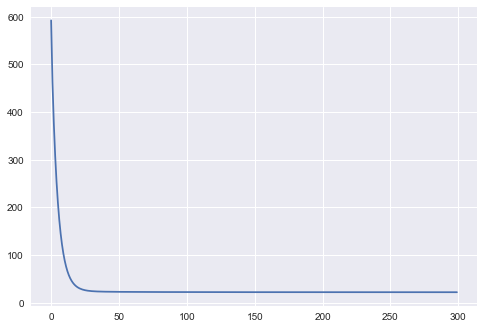

In [41]:
plt.plot(error_list)
plt.show()

In [45]:
y_ =[]
for i in range(506):
    pred=hypothesis(X[i],theta)
    y_.append(pred)
y_=np.array(y_)
print(y_)

[30.18633694 24.99095484 30.56568098 28.6220126  27.9619464  25.24452832
 22.96581931 19.4959112  11.48031987 18.87883585 18.97129884 21.54039453
 20.89285327 19.60128149 19.32367393 19.3458686  20.59832729 16.95783793
 16.23493881 18.44548854 12.55479461 17.70925422 15.88547043 13.84190443
 15.71570947 13.4205508  15.49775358 14.75818241 19.59955913 20.93977682
 11.49745095 18.09361635  8.88301038 14.31610222 13.75983633 23.77730951
 22.30988941 23.08772244 22.90940545 31.27562517 34.14934567 27.99150715
 25.15161107 24.56195221 22.86665722 22.01299699 20.35079995 17.94239765
  9.0032359  17.10959314 21.16463059 23.8404942  27.56319999 23.94281148
 15.70766609 30.96324445 24.93746243 32.91466583 21.63293708 20.92400291
 17.6977369  18.32617385 23.82616369 22.4283064  23.34895856 30.37522177
 25.5255783  21.2306401  17.52571154 20.89494847 25.20175729 21.72374982
 24.54156678 24.03905863 25.62679124 24.06381642 23.02484813 23.44984561
 21.35657377 22.51629435 28.40848967 26.96899155 26

In [50]:
def r2score(y,y_):
    num = np.sum((y-y_)**2)
    denom=np.sum((y-y.mean())**2)
    score = (1-num/denom)
    return score*100

In [51]:
##Algorithm Score
r2score(y,y_)

74.04541323942743

### Code optimization using Vectorization

In [59]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    error=0.0
    y_ = hypothesis(X,theta)
    e=np.sum((y-y_)**2)
    m=506
    return e/m

def gradient(X,y,theta):
    
    y_ = hypothesis(X,theta)
    grad=np.dot(X.T ,(y_ - y))
    m=X.shape[0]
    
    return grad/m

def grad_des(X,y,learning_rate=0.1,maxepoch=300):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(maxepoch):
        e=error(X,y,theta)
        error_list.append(e)
        
        grad=gradient(X,y,theta)
        theta = theta - learning_rate*grad
            
    return theta,error_list
    
    

In [60]:
start=time.time()
theta,error_list = grad_des(X,y)
end=time.time()
print('Time taken:' , end-start)

Time taken: 0.022126197814941406


In [61]:
print(theta)

[ 2.25328063e+01 -9.03091692e-01  1.03815625e+00  1.53477685e-02
  6.99554920e-01 -2.02101672e+00  2.70014278e+00 -1.93085233e-03
 -3.10234837e+00  2.34354753e+00 -1.72031485e+00 -2.04614394e+00
  8.47845679e-01 -3.73089521e+00]


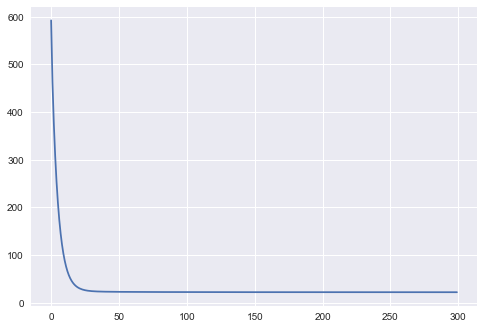

In [62]:
plt.plot(error_list)
plt.show()

In [64]:
y_=hypothesis(X,theta)
r2score(y,y_)

74.04541323942743